# KNN


### Implementation of euclidean

In [31]:
import math
def eucDistance(p1,p2):
    dis = 0
    for item in zip(p1,p2):
        dis +=(item[1]-item[0])**2
    print(round(math.sqrt(dis),2))
    
p1 = [0,3,4,5]
p2 = [7,6,3,-1]
eucDistance(p1,p2)

9.75


In [33]:
#list comprehension
def eucDistance(p1,p2):
       return round(math.sqrt(sum(pow(a-b,2) for a,b in zip(p1,p2))),2)
    
print(eucDistance(p1,p2))

9.75


# KNN Model for Cancerous tumor detection:

#Problem Statement:
To model the knn classifier using the Breast Cancer data for predicting whether a patient is suffering from the benign tumor or malignant tumor.

In [18]:
#import libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import Imputer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score

import matplotlib.pyplot as plt

# Loading Dataset

In [65]:
df = pd.read_csv('./breast-cancer-wisconsin.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


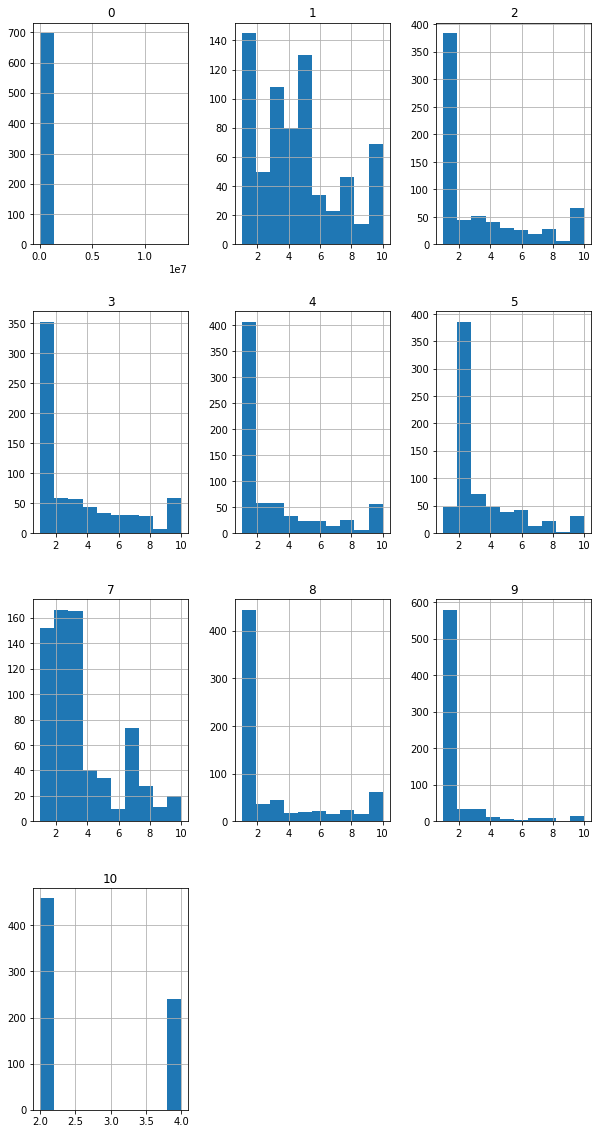

In [66]:
df.hist(figsize=(10,20))
plt.show()

Completely numerical data we can process as previous projects we will use numpy way here, 2D matrix to import

In [67]:
data = np.genfromtxt(fname ='breast-cancer-wisconsin.data', delimiter= ',', dtype= float)
data

array([[1.000025e+06, 5.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 2.000000e+00],
       [1.002945e+06, 5.000000e+00, 4.000000e+00, ..., 2.000000e+00,
        1.000000e+00, 2.000000e+00],
       [1.015425e+06, 3.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 2.000000e+00],
       ...,
       [8.888200e+05, 5.000000e+00, 1.000000e+01, ..., 1.000000e+01,
        2.000000e+00, 4.000000e+00],
       [8.974710e+05, 4.000000e+00, 8.000000e+00, ..., 6.000000e+00,
        1.000000e+00, 4.000000e+00],
       [8.974710e+05, 4.000000e+00, 8.000000e+00, ..., 4.000000e+00,
        1.000000e+00, 4.000000e+00]])

In [68]:
print("_"*20, "Prining Attributes of dataset","_"*20)
print("Dimension:-", data.ndim)
print("Shape:-", data.shape)
print("Type od data inside:-", data.dtype)

____________________ Prining Attributes of dataset ____________________
Dimension:- 2
Shape:- (699, 11)
Type od data inside:- float64


asper data plot column 0 is some kind of id, so drop it
use np.delete() method 

**Breast Cancer Data Set Attribute Information:**

Sample code number: id number

Clump Thickness: 1 – 10

Uniformity of Cell Size: 1 – 10

Uniformity of Cell Shape: 1 – 10

Marginal Adhesion: 1 – 10

Single Epithelial Cell Size: 1 – 10

Bare Nuclei: 1 – 10

Bland Chromatin: 1 – 10

Normal Nucleoli: 1 – 10

Mitoses: 1 – 10

Class: (2 for benign, 4 for malignant)

In [69]:
data = np.delete(arr=data, obj=0, axis=1)
data # now looks like a good data

array([[ 5.,  1.,  1., ...,  1.,  1.,  2.],
       [ 5.,  4.,  4., ...,  2.,  1.,  2.],
       [ 3.,  1.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  4.],
       [ 4.,  8.,  6., ...,  6.,  1.,  4.],
       [ 4.,  8.,  8., ...,  4.,  1.,  4.]])

**Devide data into train and test set**


In [70]:
X = data[:,range(0,9)]
Y = data[:,9]

In [71]:
X.shape, Y.shape

((699, 9), (699,))

### Finding Missing Values in Numpy Metrices

In [72]:
#coz dtype is float so we can perform operations like
X.sum(), X.min(), X.max()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


(nan, nan, nan)

In [73]:
Y.sum(), Y.min(), Y.max()

(1880.0, 2.0, 4.0)

**Observation:**- 
X.sum(), X.min(), X.max()--- showing (nan,nan,nan)

Because, as we know---**1 ('*') np.nan=nan** where ('*') is a native mathematical operation, so we can easily get to know there are np.nan values as dtype is float.

### Handling Misssing values

Imputation is a process of replacing missing values with substituted values. In our dataset, some columns have missing values. We can replace missing values with mean, median, mode or any particular value. Sklearn provides Imputer() method to perform imputation in 1 line of code. We just need to define missing_values, axis, and strategy. We are using “median” value of the column to substitute with the missing value.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


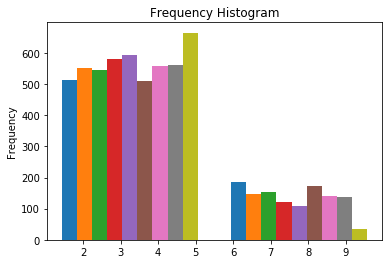

In [74]:
plt.hist(X, bins=2)

plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

plt.show()

In [75]:
imputer = Imputer(missing_values="NaN", strategy='median', axis=0)  
X = imputer.fit_transform(X)

In [76]:
X.sum(), X.min(), X.max()
 #not nan now

(19686.0, 1.0, 10.0)

In [77]:
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

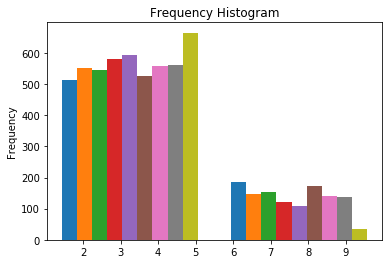

In [78]:
plt.hist(X, bins=2)

plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

plt.show()

 data is still showing same distribution so seems like using median as imputer is good

### Train, Test data split

In [79]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 10)
# y_train = y_train.ravel()
# y_test = y_test.ravel()

In [88]:
print("X_train properties(shape,dimension, dtype are):-",X_train.shape, X_train.ndim, X_train.dtype)
print("X_test properties(shape,dimension, dtype are):-",X_test.shape, X_test.ndim, X_test.dtype)

X_train properties(shape,dimension, dtype are):- (524, 9) 2 float64
X_test properties(shape,dimension, dtype are):- (175, 9) 2 float64


In [90]:
print("Y_train properties(shape,dimension, dtype are):-",y_train.shape, y_train.ndim, y_train.dtype)
print("Y_test properties(shape,dimension, dtype are):-",y_test.shape, y_test.ndim, y_test.dtype)

Y_train properties(shape,dimension, dtype are):- (524,) 1 float64
Y_test properties(shape,dimension, dtype are):- (175,) 1 float64


In [105]:
#for explicitly flatten
y_train=y_train.ravel()
y_test=y_test.ravel()

### Training and Evaluating Model for different K values

In [112]:
for K in range(10):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print("Accuracy is ", round(accuracy_score(y_test,y_pred)*100,2),"% for K-Value:",K_value)


Accuracy is  96.57 % for K-Value: 1
Accuracy is  97.14 % for K-Value: 2
Accuracy is  97.14 % for K-Value: 3
Accuracy is  96.57 % for K-Value: 4
Accuracy is  96.57 % for K-Value: 5
Accuracy is  96.57 % for K-Value: 6
Accuracy is  96.57 % for K-Value: 7
Accuracy is  96.0 % for K-Value: 8
Accuracy is  96.0 % for K-Value: 9
Accuracy is  94.86 % for K-Value: 10


It shows that we are getting 97.14% accuracy on K = 2, 3. Choosing a large value of K will lead to greater amount of execution time & underfitting. Selecting the small value of K will lead to overfitting. There is no such guaranteed way to find the best value of K. So, to run it quickly we are considering K =3 for this tutorial.

In [114]:
neigh = KNeighborsClassifier(n_neighbors = 3, weights='uniform', algorithm='auto')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [120]:
accuracy_score(y_pred, y_test)


0.9714285714285714

References:-

https://scikit-learn.org/stable/modules/impute.html

http://vision.stanford.edu/teaching/cs231n-demos/knn/

https://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/

https://people.revoledu.com/kardi/tutorial/KNN/KNN_Numerical-example.html